# Data Wrangling

### Import Libraries and Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt
import re 

In [2]:
job_data = pd.read_csv('../raw data/DataAnalyst.csv')

In [3]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [4]:
#remove the unnamed column
job_data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [5]:
job_data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


### Check for Missing Values

In [6]:
missing = pd.concat([job_data.isnull().sum(), 100 * job_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count','%'],ascending= False)

,count,%
Company Name,1,0.044385
Job Title,0,0.000000
Salary Estimate,0,0.000000
Job Description,0,0.000000
Rating,0,0.000000
Location,0,0.000000
Headquarters,0,0.000000
Size,0,0.000000
Founded,0,0.000000
Type of ownership,0,0.000000


Sometimes 'missingness' can be encoded, perhaps by a -1 or 999 since isnull() is not the only indicator of missing data, we need to do some investigation here.

In [7]:
#converting data types
job_data = job_data.astype({'Job Title':'string','Salary Estimate':'string','Job Description':'string','Company Name':'string',
                           'Location':'string','Headquarters':'string','Size':'string','Type of ownership':'string',
                           'Industry':'string','Sector':'string','Revenue':'string','Competitors':'string','Easy Apply':'string'})
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2253 non-null   string 
 1   Salary Estimate    2253 non-null   string 
 2   Job Description    2253 non-null   string 
 3   Rating             2253 non-null   float64
 4   Company Name       2252 non-null   string 
 5   Location           2253 non-null   string 
 6   Headquarters       2253 non-null   string 
 7   Size               2253 non-null   string 
 8   Founded            2253 non-null   int64  
 9   Type of ownership  2253 non-null   string 
 10  Industry           2253 non-null   string 
 11  Sector             2253 non-null   string 
 12  Revenue            2253 non-null   string 
 13  Competitors        2253 non-null   string 
 14  Easy Apply         2253 non-null   string 
dtypes: float64(1), int64(1), string(13)
memory usage: 264.1 KB


In [8]:
job_data['Competitors'].value_counts()

-1                                                                  1732
Adecco, Manpower                                                      14
Robert Half, Insight Global                                           14
TEKsystems, Insight Global, Accenture                                 10
Artech Information Systems, Mindlance, Tech Mahindra                  10
                                                                    ... 
Sunrun, Vivint Solar, Trinity Solar                                    1
OpenSymmetry, Perficient, DataClarity                                  1
PathFinder Staffing, Juno Search Partners, Robert Half                 1
Blue Yonder, SAP, NCR                                                  1
Illumina, Thermo Fisher Scientific, Oxford Nanopore Technologies       1
Name: Competitors, Length: 291, dtype: Int64

In [9]:
job_data['Salary Estimate'].value_counts()

$41K-$78K (Glassdoor est.)     57
$42K-$76K (Glassdoor est.)     57
$50K-$86K (Glassdoor est.)     41
$35K-$67K (Glassdoor est.)     33
$60K-$124K (Glassdoor est.)    31
                               ..
$36K-$67K (Glassdoor est.)      3
$47K-$81K (Glassdoor est.)      3
$43K-$77K (Glassdoor est.)      3
$57K-$70K (Glassdoor est.)      2
-1                              1
Name: Salary Estimate, Length: 90, dtype: Int64

In [10]:
job_data['Rating'].value_counts()

-1.0    272
 3.9    140
 3.6    135
 3.7    132
 5.0    131
 3.8    130
 4.0    129
 3.5    125
 4.1    119
 3.3    109
 3.4    101
 3.2     91
 3.1     68
 3.0     57
 4.3     55
 4.2     47
 4.5     47
 4.6     46
 4.4     46
 2.8     43
 2.9     40
 2.5     32
 4.8     29
 2.7     25
 4.7     23
 4.9     17
 2.6     14
 2.4     10
 1.0     10
 2.3      9
 2.0      6
 2.1      4
 2.2      3
 1.6      2
 1.8      2
 1.9      2
 1.7      2
Name: Rating, dtype: int64

In [11]:
job_data['Size'].value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: Int64

In [12]:
job_data['Revenue'].value_counts()

Unknown / Non-Applicable            615
$100 to $500 million (USD)          218
$50 to $100 million (USD)           199
$10+ billion (USD)                  189
-1                                  163
$10 to $25 million (USD)            132
$2 to $5 billion (USD)              129
$1 to $5 million (USD)              111
$25 to $50 million (USD)            110
Less than $1 million (USD)           93
$1 to $2 billion (USD)               87
$500 million to $1 billion (USD)     79
$5 to $10 million (USD)              72
$5 to $10 billion (USD)              56
Name: Revenue, dtype: Int64

In [13]:
job_data['Founded'].value_counts()

-1       660
 2008     80
 1996     54
 2000     54
 2002     54
        ... 
 1924      1
 1922      1
 1918      1
 1908      1
 1682      1
Name: Founded, Length: 161, dtype: int64

In [14]:
job_data['Type of ownership'].value_counts()

Company - Private                 1273
Company - Public                   452
-1                                 163
Nonprofit Organization             124
Subsidiary or Business Segment      89
Government                          37
College / University                34
Hospital                            19
Unknown                             16
Other Organization                  13
Contract                            11
School / School District             9
Private Practice / Firm              9
Self-employed                        2
Franchise                            2
Name: Type of ownership, dtype: Int64

In [15]:
job_data['Industry'].value_counts()

-1                                          353
IT Services                                 325
Staffing & Outsourcing                      323
Health Care Services & Hospitals            151
Computer Hardware & Software                111
                                           ... 
Stock Exchanges                               1
Consumer Electronics & Appliances Stores      1
Pet & Pet Supplies Stores                     1
Express Delivery Services                     1
Chemical Manufacturing                        1
Name: Industry, Length: 89, dtype: Int64

In [16]:
job_data['Sector'].value_counts()

Information Technology                570
Business Services                     524
-1                                    353
Finance                               169
Health Care                           151
Education                              52
Insurance                              51
Accounting & Legal                     43
Media                                  42
Manufacturing                          40
Retail                                 38
Government                             36
Biotech & Pharmaceuticals              33
Non-Profit                             26
Aerospace & Defense                    22
Transportation & Logistics             20
Construction, Repair & Maintenance     16
Consumer Services                      14
Oil, Gas, Energy & Utilities           13
Real Estate                            12
Telecommunications                     11
Restaurants, Bars & Food Services       8
Arts, Entertainment & Recreation        7
Travel & Tourism                  

It seems like some of the columns contain null data like -1, '-1', -1.0, 'Unknown', and 'Unknown / Non-Applicable',and we need to clean these.

In [17]:
job_data=job_data.replace(-1,np.nan)
job_data=job_data.replace(-1.0,np.nan)
job_data=job_data.replace('-1',np.nan)
job_data=job_data.replace('Unknown',np.nan)
job_data=job_data.replace('Unknown / Non-Applicable',np.nan)

In [18]:
new_missing = pd.concat([job_data.isnull().sum(), 100 * job_data.isnull().mean()], axis=1)
new_missing.columns=['count', '%']
new_missing.sort_values(by=['count','%'],ascending= False)

,count,%
Easy Apply,2173,96.449179
Competitors,1732,76.875277
Revenue,778,34.531735
Founded,660,29.294274
Industry,353,15.667998
Sector,353,15.667998
Rating,272,12.072792
Size,205,9.098979
Type of ownership,179,7.944962
Headquarters,172,7.634265


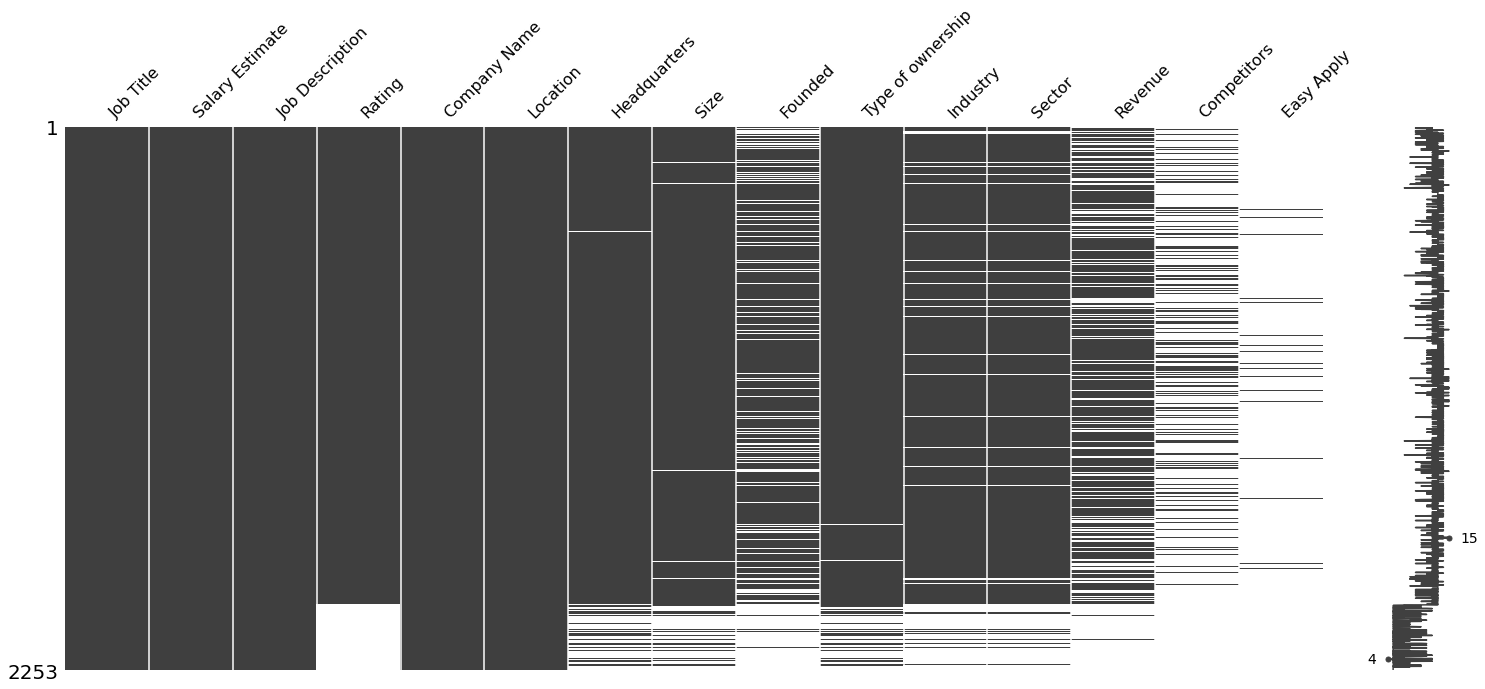

In [19]:
# Visualize missingness
msno.matrix(job_data.sort_values(by = 'Rating',ascending = True))
plt.show()

Now we can see that 'Easy Apply' and 'Competitors' have maximum number of missing values, which are 96% and 77%, respectively. According to Glassdoor, 'Easy Apply' is a job application mechanism that allows job seekers to apply to a job requisition directly on Glassdoor. Since these two columns are not features that directly related to the salary, we will drop these columns. There is essentially no information in these two columns.
In addition, note that there seems to be a pattern on some of the missing data. For examples, missing industry info always occur with missing sector info; also, the missingness of headquaters, size, type of ownership, and revenue are very consistent, and when these data are missing, the rating is missing too.

In [20]:
#Drop Competitors and Easy Apply
job_data.drop(['Competitors','Easy Apply'], axis=1,inplace=True)

In [21]:
#Drop the one row with missing Salary infomation since salary is our target.
job_data.drop(job_data[job_data['Salary Estimate'].isna()].index,inplace=True)

In [22]:
#See how many rows that contain more than half of missing values
job_data[job_data.isna().sum(axis=1)>6].shape[0]

164

In [23]:
#drop these all rows that contain more than 50% of missing values 
job_data.drop(job_data[job_data.isna().sum(axis=1)>6].index,inplace = True)

In [24]:
#Checking for missing values again after dropping some rows and columns
new_missing_2 = pd.concat([job_data.isnull().sum(), 100 * job_data.isnull().mean()], axis=1)
new_missing_2.columns=['count', '%']
new_missing_2.sort_values(by=['count','%'],ascending= False)

,count,%
Revenue,614,29.406130
Founded,496,23.754789
Industry,189,9.051724
Sector,189,9.051724
Rating,108,5.172414
Size,41,1.963602
Type of ownership,15,0.718391
Headquarters,9,0.431034
Job Title,0,0.000000
Salary Estimate,0,0.000000


In [25]:
job_data.shape

(2088, 13)

After dropping some rows and columns which contain massive missing values, we now have 2088 observations and 13 features left. Among all the features we have left, 'Revenue' and 'Founded' have maximum number of missing values, which are 29% and 24%, respectively. We'll need to find a way to impute those values later. 

### Columns - Data Types and Formats

#### Founded -- Years Founded

Since the info about the age of a company will be more useful than the info about which year the company was founded, we transform the column ' Founded' to 'Years Founded'.

In [26]:
#Change the column 'Founded' to 'Years Founded'
today_year = dt.date.today().year
job_data['Years Founded'] = today_year - job_data['Founded']
job_data.drop(['Founded'],axis=1,inplace = True)

#### Salary Estimate -- Min_Salary & Max Salary

In [27]:
#Split salary into two columns min salary and max salary.
job_data['Salary Estimate'] = job_data['Salary Estimate'].str.strip('(Glassdoor est.)')
job_data['Min_Salary($K)'] = job_data['Salary Estimate'].str.split('-').str.get(0).str.strip('$K').astype('int')
job_data['Max_Salary($K)'] = job_data['Salary Estimate'].str.split('-').str.get(1).str.strip('$K').astype('int')
job_data.drop(['Salary Estimate'], axis=1,inplace=True)

#### Company Name

We see that the entries in the column Company Name always have the rating attached to it at the end when ratings are not missing, and we want to keep only the company name in that column.

In [28]:
#Remove the rating in the column 'Company Name'
job_data['Company Name'] = job_data['Company Name'].str.split('\n').str.get(0)

#### Job Title -- Seniority

In [29]:
job_data['Job Title'].value_counts().head(25)

Data Analyst                            374
Senior Data Analyst                      82
Junior Data Analyst                      30
Business Data Analyst                    26
Sr. Data Analyst                         19
Data Analyst Junior                      17
Data Analyst II                          17
Data Quality Analyst                     17
Data Governance Analyst                  16
Lead Data Analyst                        15
Data Reporting Analyst                   12
Data Analyst III                         11
Data Analyst I                           10
Sr Data Analyst                           9
Financial Data Analyst                    9
Data Management Analyst                   8
Marketing Data Analyst                    8
Data Warehouse Analyst                    8
SQL Data Analyst                          7
Technical Data Analyst                    7
Clinical Data Analyst                     6
Data Security Analyst                     6
Data Science Analyst            

There are 1148 unique job titles here, and a lot of them only have 1 count; therefore, we need to consolidate them. We decide to create a new feature named 'Seniority', which indicates if each of these roles is junior role, senior role, or neither/unknown/NA.

In [30]:
# Create new feature 'Seniority' from 'Job Title'
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'Senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower() or 'entry level' in title.lower():
        return 'Junior'
    else:
        return 'N/A'
job_data['Seniority'] = job_data['Job Title'].apply(seniority)

In [31]:
job_data['Seniority'].value_counts()

N/A       1565
Senior     446
Junior      77
Name: Seniority, dtype: int64

In [32]:
#Drop the column 'Job Title'
job_data.drop('Job Title', axis=1,inplace=True)

#### Size

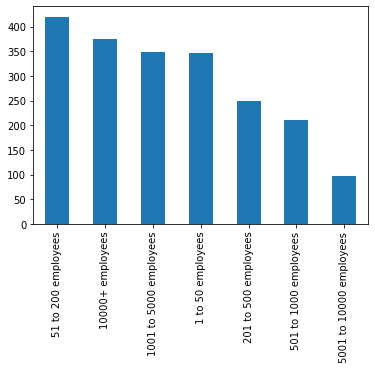

In [33]:
#Size distribution
job_data['Size'].astype('category').value_counts().plot(kind='bar')
plt.show()

In [34]:
by_size = job_data.groupby('Size').mean()
by_size['Mean_Salary($K)'] = (by_size['Min_Salary($K)']+by_size['Max_Salary($K)'])/2
by_size.sort_values(by = 'Mean_Salary($K)',ascending = True)

,Rating,Years Founded,Min_Salary($K),Max_Salary($K),Mean_Salary($K)
Size,,,,,
10000+ employees,3.633067,90.686649,52.141333,87.773333,69.957333
201 to 500 employees,3.667886,24.837321,53.602410,88.783133,71.192771
501 to 1000 employees,3.647867,26.572917,54.526066,89.450237,71.988152
51 to 200 employees,4.024495,16.078689,54.340476,90.702381,72.521429
1 to 50 employees,3.860764,15.357143,54.858790,90.564841,72.711816
1001 to 5000 employees,3.509798,36.654088,54.928161,90.810345,72.869253
5001 to 10000 employees,3.636082,50.321839,55.505155,92.896907,74.201031


We grouped the data by size, and there doesn't seem to be a linear correlation between company size and salary. Therefore, when we do imputation for missing size values later, we can try to impute them with mean or median. In addition, it seems that there is a positive linear correlation between Size and Years Founded. So when we are doing imputation for the missing Years Founded, we can consider grouping by size first and use mean or median of each size group to impute missing Years. 

#### Location & Headquarters

In [35]:
job_data['Location'].value_counts()

New York, NY            292
Chicago, IL             119
San Francisco, CA       112
Austin, TX               77
Los Angeles, CA          73
                       ... 
Fort Sam Houston, TX      1
East Palo Alto, CA        1
Queens Village, NY        1
Suffolk, VA               1
Woodbridge, NJ            1
Name: Location, Length: 242, dtype: Int64

We are going to keep only the state names in Location.

In [36]:
# Keeping only the state names in location
job_data['Location'] = job_data['Location'].apply(lambda x: x.split(', ')[-1])
job_data['Location'].value_counts()

CA    582
TX    372
NY    320
IL    153
PA    104
CO     90
AZ     89
NC     83
NJ     79
WA     45
VA     44
OH     32
UT     30
FL     24
IN     23
DE      9
GA      4
SC      3
KS      2
Name: Location, dtype: int64

In [37]:
job_data['Headquarters'].nunique()

482

Same with what we did with Location, we are going to keep only the state names in Headquaters. Then we will transform the feature Headquarters to a new feature named 'HQ_Same', which contains only 0 and 1.(1 if the headquaster is in the same state  as the job location, and 0 if headquaster state is different from the job location state.)

In [38]:
# Keeping only the state names in location
job_data['Headquarters'] = job_data[~job_data['Headquarters'].isna()]['Headquarters'].apply(lambda x: x.split(', ')[-1])

In [40]:
# Create 'HQ_Same'
job_data['HQ_Same'] = job_data.apply(lambda x: 1 if x.Location == x.Headquarters else 0,axis =1)
job_data.drop('Headquarters',axis=1,inplace = True)
job_data['HQ_Same'].value_counts()

0    1142
1     946
Name: HQ_Same, dtype: int64

In [43]:
job_data.head()

,Job Description,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,Years Founded,Min_Salary($K),Max_Salary($K),Seniority,HQ_Same
0,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,NY,201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),59.0,37,66,N/A,1
1,Overview Provides analytical and technical su...,3.8,Visiting Nurse Service of New York,NY,10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),127.0,37,66,N/A,1
2,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,NY,1001 to 5000 employees,Company - Private,Internet,Information Technology,<NA>,17.0,37,66,Senior,1
3,Requisition NumberRR-0001939 Remote:Yes We col...,4.1,Celerity,NY,201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),18.0,37,66,N/A,0
4,ABOUT FANDUEL GROUP FanDuel Group is a world-...,3.9,FanDuel,NY,501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),11.0,37,66,N/A,1


#### Job Description -- Skills

Now we want to create a new columns named **Skills**, which contains info about common technical skills that each observation has.

In [44]:
# Removing punctuations '\n' in entries in 'Job Description'  
job_data['Job Description'] = job_data['Job Description'].apply(lambda x: re.sub(r'[^\w\s]', '', x)).replace('\n', ' ')
# Split strings in 'Job Description'
job_data['Job Description'] = job_data['Job Description'].str.upper().str.split()

In [51]:
# Define the function 'findskills'
def findskills(words_list, skillset):
        result_list = []
        for word in words_list:
            if word in skillset:
                result_list.append(word)
        return (list(set(result_list)))

To define a fair skill set, we need to find out what technical skills got mentions the most in job descriptions.

In [46]:
# Define common technical skills required for Data Analysts
possible_skills = ['PYTHON','R','SQL','HADOOP','JAVA','SAS','MATLAB','SPARK','HIVE','TABLEAU','Microsoft','Excel','SPREADSHEET',
                  'SPREADSHEETS']

In [47]:
def has_skill(words_list, skill):
    skill = skill.upper()
    if skill in words_list:
        return True
    else:
        return False
                
frequency = {}
for skill in possible_skills:
    frequency[skill] = job_data['Job Description'].apply(lambda x: has_skill(x, skill)).sum()

frequency 

{'PYTHON': 564,
 'R': 366,
 'SQL': 1228,
 'HADOOP': 118,
 'JAVA': 80,
 'SAS': 308,
 'MATLAB': 24,
 'SPARK': 64,
 'HIVE': 67,
 'TABLEAU': 561,
 'Microsoft': 454,
 'Excel': 823,
 'SPREADSHEET': 34,
 'SPREADSHEETS': 48}

Seems like SQL, Microsoft Excel, Tableau, Python, R, and SAS are the top skills that the employers are looking for. So we can refine out skill set to one that only contains the hottest skills.

In [48]:
top_skills = ['SQL','PYTHON','TABLEAU','PYTHON','R','SAS']

In [52]:
job_data['Skills'] = job_data['Job Description'].apply(lambda x: findskills(x, top_skills))

In [53]:
job_data['Skills'].value_counts()

[]                                650
[SQL]                             385
[TABLEAU, SQL]                    130
[PYTHON, SQL]                     120
[SAS, SQL]                        110
[SQL, TABLEAU]                     72
[TABLEAU]                          61
[PYTHON, R, SQL]                   56
[SAS, TABLEAU, SQL, PYTHON, R]     44
[R, PYTHON, SQL]                   35
[PYTHON]                           32
[PYTHON, SQL, TABLEAU]             30
[R, PYTHON, SQL, TABLEAU]          24
[PYTHON, R, SQL, TABLEAU]          23
[SAS]                              22
[TABLEAU, PYTHON, SQL]             21
[SAS, R, SQL]                      20
[SQL, PYTHON, R, TABLEAU]          18
[SAS, TABLEAU, SQL]                18
[R, TABLEAU, PYTHON, SQL]          17
[SAS, SQL, PYTHON, TABLEAU]        15
[PYTHON, R]                        14
[SQL, PYTHON, TABLEAU]             14
[PYTHON, TABLEAU]                  14
[SAS, R]                           12
[SAS, R, PYTHON, SQL]              11
[SAS, PYTHON

In [54]:
job_data.head()

,Job Description,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,Years Founded,Min_Salary($K),Max_Salary($K),Seniority,HQ_Same,Skills
0,"[ARE, YOU, EAGER, TO, ROLL, UP, YOUR, SLEEVES,...",3.2,Vera Institute of Justice,NY,201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),59.0,37,66,N/A,1,"[R, PYTHON, SQL]"
1,"[OVERVIEW, PROVIDES, ANALYTICAL, AND, TECHNICA...",3.8,Visiting Nurse Service of New York,NY,10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),127.0,37,66,N/A,1,"[SAS, R, SQL]"
2,"[WERE, LOOKING, FOR, A, SENIOR, DATA, ANALYST,...",3.4,Squarespace,NY,1001 to 5000 employees,Company - Private,Internet,Information Technology,<NA>,17.0,37,66,Senior,1,"[TABLEAU, SQL]"
3,"[REQUISITION, NUMBERRR0001939, REMOTEYES, WE, ...",4.1,Celerity,NY,201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),18.0,37,66,N/A,0,"[TABLEAU, SQL]"
4,"[ABOUT, FANDUEL, GROUP, FANDUEL, GROUP, IS, A,...",3.9,FanDuel,NY,501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),11.0,37,66,N/A,1,"[PYTHON, SQL]"


#### Distributions Of Feature Values

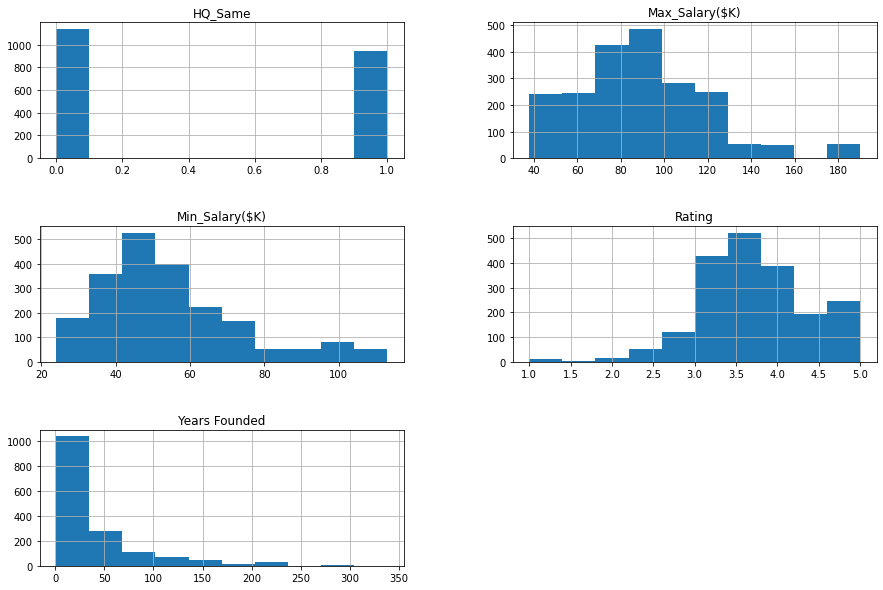

In [55]:
job_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

#### Check For Outliers

We see that most companies have 0-240 years of history, and so we want to look into those with the longest length of history to see if the the Years Founded was recorded correctly. 

In [56]:
job_data[job_data['Years Founded']>250]

,Job Description,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,Years Founded,Min_Salary($K),Max_Salary($K),Seniority,HQ_Same,Skills
1088,"[UNIVERSITY, OVERVIEW, THE, UNIVERSITY, OF, PE...",4.3,University of Pennsylvania,PA,10000+ employees,College / University,Colleges & Universities,Education,<NA>,280.0,41,78,N/A,1,"[SAS, TABLEAU, SQL, PYTHON, R]"
1096,"[UNIVERSITY, OVERVIEW, THE, UNIVERSITY, OF, PE...",4.3,University of Pennsylvania,PA,10000+ employees,College / University,Colleges & Universities,Education,<NA>,280.0,38,68,Junior,1,"[PYTHON, R]"
1105,"[UNIVERSITY, OVERVIEWTHE, UNIVERSITY, OF, PENN...",4.3,University of Pennsylvania,PA,10000+ employees,College / University,Colleges & Universities,Education,<NA>,280.0,38,68,N/A,1,[]
1123,"[UNIVERSITY, OVERVIEW, THE, UNIVERSITY, OF, PE...",4.3,University of Pennsylvania,PA,10000+ employees,College / University,Colleges & Universities,Education,<NA>,280.0,37,44,Senior,1,"[PYTHON, R]"
1126,"[UNIVERSITY, OVERVIEW, THE, UNIVERSITY, OF, PE...",4.3,University of Pennsylvania,PA,10000+ employees,College / University,Colleges & Universities,Education,<NA>,280.0,37,44,N/A,1,[]
1845,"[ROLE, PROFILE, DATA, QUALITY, ANALYTICS, IS, ...",3.2,London Stock Exchange Group,NC,1001 to 5000 employees,Company - Public,Stock Exchanges,Finance,$50 to $100 million (USD),322.0,54,75,N/A,0,[]
2023,"[AND, INCREASING, PRIVATE, PHILANTHROPY, UDAR,...",4.1,University of California Berkeley,CA,10000+ employees,College / University,Colleges & Universities,Education,$500 million to $1 billion (USD),338.0,65,120,N/A,1,[TABLEAU]


After doing some research work, we found that University of California Berkeley was founded in 1868 instead of 1682. We believe that's a record error and decide to correct it.

In [58]:
# Correct the 'Years Founded' for University of California Berkeley
job_data.loc[job_data['Company Name']=='University of California Berkeley','Years Founded'] = today_year - 1868

### Duplicate rows